# House Price Prediction

## 1. Data Reading 

In [1]:
#importing all the mandatory libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import os

#for hiding warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
# reading the .csv dataset file
housing_data = pd.read_csv('train.csv')
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#shape of the dataset
housing_data.shape

(1460, 81)

In [4]:
#summary/information of the dataset
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#describe other attributes of the given dataset
housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 2. Data Cleaning 

In [6]:
#check the numbe of null values present for object type
housing_data.select_dtypes(include='object').isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [7]:
#check number of null values present in percent
round(100*(housing_data.select_dtypes(include='object').isnull().sum()/len(housing_data.index)),2)

MSZoning          0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinType2      2.60
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
KitchenQual       0.00
Functional        0.00
FireplaceQu      47.26
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
GarageCond        5.55
PavedDrive        0.00
PoolQC           99.52
Fence            80.75
MiscFeature      96.30
SaleType          0.00
SaleCondition     0.00
dtype: floa

### Handling Null Values

#### For Handling Null values present in dataset, we should impute null values according to the data dictionary provided with the data instead of dropping the null values which will lead to loss of data. 

In [8]:
#In Alley column, NA means No Alley. So we will replace NA with No Alley
housing_data['Alley'].fillna('No Alley',inplace=True)

In [9]:
#In PoolQC column, NA means No Pool. So we will replace NA with No Pool
housing_data['PoolQC'].fillna('No Pool',inplace=True)

In [10]:
#In Fence column, NA means No Fence. So we will replace NA with No Fence
housing_data['Fence'].fillna('No Fence',inplace=True)

In [11]:
#In FireplaceQu column, NA means No Fireplace. So we will replace NA with No Fireplace
housing_data['FireplaceQu'].fillna('No Fireplace',inplace=True)

In [12]:
#In GarageType, GarageFinish, GarageQual, GarageCond columns NA means No Garage. So we will replace NA with No Garage
housing_data['GarageType'].fillna('No Garage',inplace=True)
housing_data['GarageFinish'].fillna('No Garage',inplace=True)
housing_data['GarageQual'].fillna('No Garage', inplace=True)
housing_data['GarageCond'].fillna('No Garage', inplace=True)

In [13]:
#In BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 columns NA means No Basement. 
#So we will replace NA with No Basement
housing_data['BsmtQual'].fillna('No Basement',inplace=True)
housing_data['BsmtCond'].fillna('No Basement',inplace=True)
housing_data['BsmtExposure'].fillna('No Basement',inplace=True)
housing_data['BsmtFinType1'].fillna('No Basement',inplace=True)
housing_data['BsmtFinType2'].fillna('No Basement',inplace=True)

In [14]:
#In MiscFeature and MasVnrTypecolumn, NA means None. So replace NA with None
housing_data['MiscFeature'].fillna('None',inplace=True)
housing_data['MasVnrType'].fillna('None',inplace=True)

In [15]:
#Remove the columns with skewed data.To check the skewed data columns using function
def getSkewedDataColumns():
    column = []
    categorical_columns = housing_data.select_dtypes(include=('object'))
    for col in (categorical_columns):
        if(housing_data[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsWithSkewed = getSkewedDataColumns()

In [16]:
#Remove the columns with skewed data which is more than 85 percent. So we will drop that columns
housing_data.drop(columnsWithSkewed,axis=1,inplace=True)
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,No Fireplace,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,No Fence,0,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,No Fence,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,No Fence,0,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,No Fence,0,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,No Fence,0,12,2008,Normal,250000


In [17]:
#Checking number of null values present again for categorical columns
housing_data.select_dtypes(include='object').isnull().sum()

MSZoning         0
LotShape         0
LotConfig        0
Neighborhood     0
BldgType         0
HouseStyle       0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
Foundation       0
BsmtQual         0
BsmtExposure     0
BsmtFinType1     0
HeatingQC        0
KitchenQual      0
FireplaceQu      0
GarageType       0
GarageFinish     0
Fence            0
SaleCondition    0
dtype: int64

#### Removing null values in Numerical attributes

In [18]:
#Now clean the numeric attributes
housing_data.select_dtypes(include=['float64','int64']).head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [19]:
housing_data.select_dtypes(include=['float64','int64']).isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [20]:
# In LotFrontage and MasVnrArea columns have null values, we will replace null value with median values.
housing_data['LotFrontage'] = housing_data['LotFrontage'].replace(np.nan,housing_data['LotFrontage'].median())
housing_data['MasVnrArea'] = housing_data['MasVnrArea'].replace(np.nan,housing_data['MasVnrArea'].median())

In [21]:
#For GarageYrBlt column null values, we will replavce null value with 0 for now
housing_data['GarageYrBlt'].fillna(0,inplace=True)

In [22]:
#create new column isRemodel which determine whether house has been remodelled or not
def checkIfRemodelled(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
housing_data['isRemodel'] = housing_data.apply(checkIfRemodelled,axis=1)
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,isRemodel
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,No Fireplace,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,No Fence,0,2,2008,Normal,208500,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,No Fence,0,5,2007,Normal,181500,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,No Fence,0,9,2008,Normal,223500,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,No Fence,0,2,2006,Abnorml,140000,1
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,No Fence,0,12,2008,Normal,250000,0


In [23]:
#Create a new column named BuiltOrRemodelTime to determine age of build at the time of sell
def getBuildingAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']

housing_data['BuiltOrRemodelTime'] = housing_data.apply(getBuildingAge,axis=1)
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,isRemodel,BuiltOrRemodelTime
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,No Fireplace,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,No Fence,0,2,2008,Normal,208500,0,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,No Fence,0,5,2007,Normal,181500,0,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,No Fence,0,9,2008,Normal,223500,1,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,No Fence,0,2,2006,Abnorml,140000,1,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,No Fence,0,12,2008,Normal,250000,0,8


In [24]:
#New column for indicationg whether garage is new(1) or old(0).
#Garage Year Built less than 2000 will be considered as old else new
def garageBuiltTime(row):
    if row == 0:
        return 0
    elif row > 1900 and row < 2000:
        return 0
    else:
        return 1

housing_data['NewOrOldGarage'] = housing_data['GarageYrBlt'].apply(garageBuiltTime)
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,isRemodel,BuiltOrRemodelTime,NewOrOldGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,No Fireplace,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,No Fence,0,2,2008,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,No Fence,0,5,2007,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,No Fence,0,9,2008,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,No Fence,0,2,2006,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,No Fence,0,12,2008,Normal,250000,0,8,1


In [25]:
#drop old attributes from which new attributes where created
housing_data.drop(['GarageYrBlt','YearRemodAdd','YrSold','YearBuilt'],axis=1,inplace=True)

In [26]:
#Remove the columns with skewed data for numerical attributes.To check the skewed data columns using function
def getSkewedDataNumericalColumns():
    column = []
    numerical_columns = housing_data.select_dtypes(include=['float64','int64'])
    for col in (numerical_columns):
        if(housing_data[col].value_counts().max() >= 1241):
            column.append(col)
    return column

numericalColumnsWithSkewed = getSkewedDataNumericalColumns()

In [27]:
#Remove the numerical columns with skewed data which is more than 85 percent.
#So we will drop that columns.And MoSold which will not be useful
housing_data.drop(numericalColumnsWithSkewed,axis=1,inplace=True)
housing_data.drop(['MoSold'],axis=1,inplace=True)
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,isRemodel,BuiltOrRemodelTime,NewOrOldGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,No Fireplace,Attchd,RFn,2,548,0,61,No Fence,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,RFn,2,460,298,0,No Fence,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,RFn,2,608,0,42,No Fence,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,Unf,3,642,0,35,No Fence,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,RFn,3,836,192,84,No Fence,Normal,250000,0,8,1


#### Outlier Treatment

In [28]:
housing_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,isRemodel,BuiltOrRemodelTime,NewOrOldGarage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,1162.626712,346.992466,1515.463699,0.425342,1.565068,0.382877,2.866438,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890,0.476712,22.950000,0.276027
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,386.587738,436.528436,525.480383,0.518911,0.550916,0.502885,0.815778,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883,0.499629,20.640653,0.447184
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,1.000000,0.000000,2.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000,0.000000,4.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,2.000000,0.000000,3.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,0.000000,14.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,2.000000,1.000000,3.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,1.000000,41.000000,1.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,1680.000000,954.200000,2158.300000,1.000000,2.000000,1.000000,4.000000,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,278000.000000,1.000000,56.000000,1.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,1831.250000,1141.050000,2466.100000,1.000000,2.000000,1.000000,4.000000,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,326100.000000,1.000000,58.000000,1.000000
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,2219.460000,1418.920000,3123.480000,2.000000,3.000000,1.000000,5.000000,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,442567.010000,1.000000,60.000000,1.000000


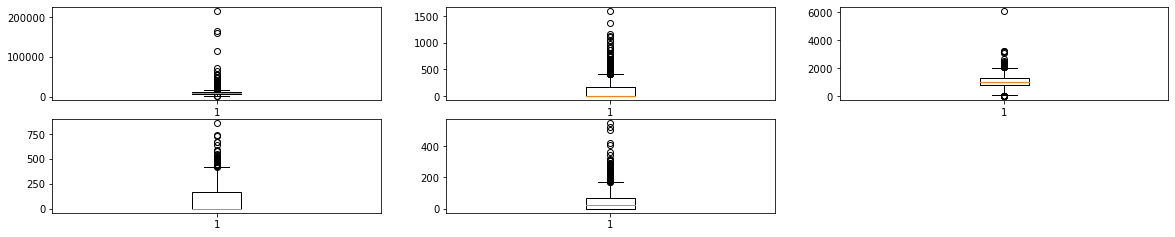

In [29]:
#Check the outliers in some numerical attributes
plt.figure(figsize=(20,10))
plt.subplot(5,3,1)
plt.boxplot(housing_data['LotArea'])
plt.subplot(5,3,2)
plt.boxplot(housing_data['MasVnrArea'])
plt.subplot(5,3,3)
plt.boxplot(housing_data['TotalBsmtSF'])
plt.subplot(5,3,4)
plt.boxplot(housing_data['WoodDeckSF'])
plt.subplot(5,3,5)
plt.boxplot(housing_data['OpenPorchSF'])
plt.show()

In [30]:
#Removing values beyond 98% for LotArea
Q3 = housing_data['LotArea'].quantile(0.98)
housing_data = housing_data[housing_data['LotArea'] < Q3]

In [31]:
#Removing values beyond 98% for MasVnrArea
Q3 = housing_data['MasVnrArea'].quantile(0.98)
housing_data = housing_data[housing_data['MasVnrArea'] < Q3]

In [32]:
#Removing values beyond 99% for TotalBsmtSF
Q3 = housing_data['TotalBsmtSF'].quantile(0.99)
housing_data = housing_data[housing_data['TotalBsmtSF'] < Q3]

In [33]:
#Removing values beyond 99% for WoodDeckSF
Q3 = housing_data['WoodDeckSF'].quantile(0.99)
housing_data = housing_data[housing_data['WoodDeckSF'] < Q3]

In [34]:
#Removing values beyond 99% for OpenPorchSF
Q3 = housing_data['OpenPorchSF'].quantile(0.99)
housing_data = housing_data[housing_data['OpenPorchSF'] < Q3]

## 3. Data Visualization

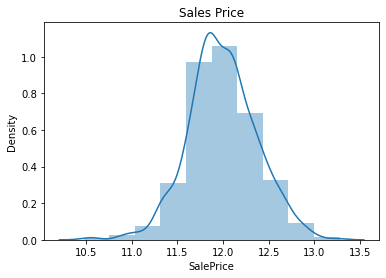

In [35]:
# Visualizing Target Variable i.e SalePrice Variable
housing_data['SalePrice'] = np.log1p(housing_data['SalePrice'])
plt.title('Sales Price')
sns.distplot(housing_data['SalePrice'],bins=10)
plt.show()

The target variable SalePrice looks to be normalized with some noise

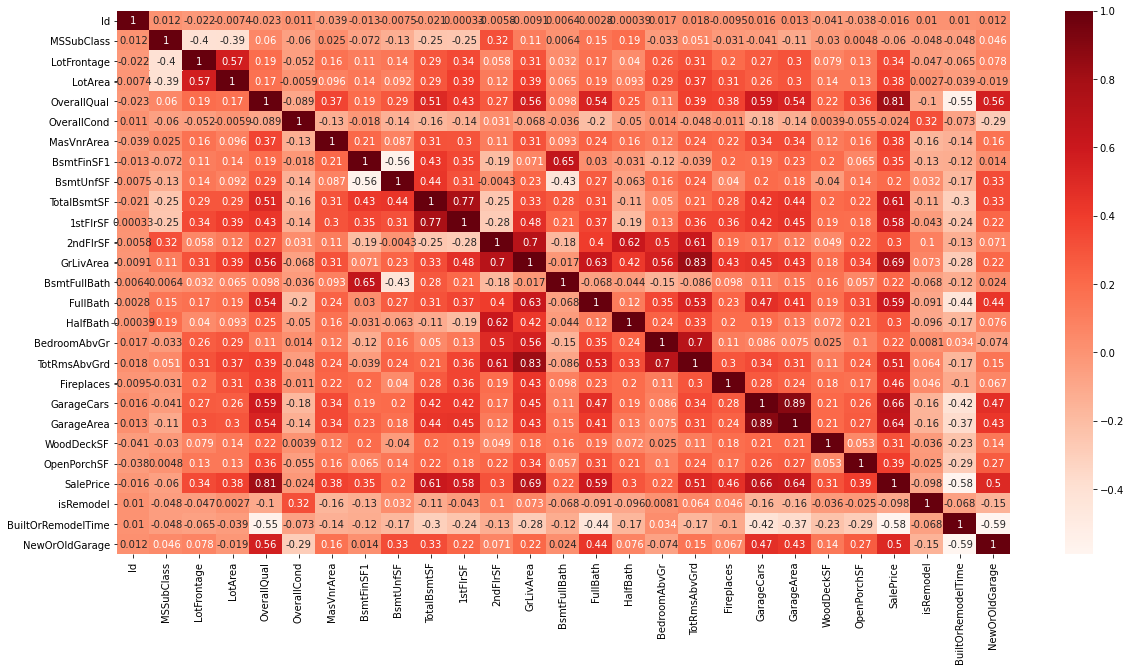

In [36]:
#Check the correlation
plt.figure(figsize=(20,10))
sns.heatmap(housing_data.corr(), annot = True, cmap="Reds")
plt.show()

#### Following columns should be removed which shows high correlation
- TotRmsAbvGrd and GrLivArea shows 83%
- Garage Area and Garage Cars shows 89%

So drop TotRmsAbvGrd and Garage Area

In [37]:
#Removing High Correlated variables
housing_data.drop(['TotRmsAbvGrd','GarageArea'],axis=1,inplace=True)

## 4. Data Preparation
- Convert Categorical data into numerical data
- Creating Dummies

In [38]:
#Since the values of the following fields are ordered list, we'll assign values to them sequentially

#We will give an ordered sequence value for values which can be ordered
#We have categorised values into 0 and 1 for values which cannot be ordered
housing_data['d_LotShape'] = housing_data['LotShape'].map({'Reg':3,'IR1':2,'IR2':1,'IR3':0})
housing_data['d_ExterQual'] = housing_data['ExterQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
housing_data['d_BsmtQual'] = housing_data['BsmtQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Basement':0})
housing_data['d_BsmtExposure'] = housing_data['BsmtExposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'No Basement':0})
housing_data['d_BsmtFinType1'] = housing_data['BsmtFinType1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,
                                                                   'No Basement':0})
housing_data['d_HeatingQC'] = housing_data['HeatingQC'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
housing_data['d_KitchenQual'] = housing_data['KitchenQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
housing_data['d_FireplaceQu'] = housing_data['FireplaceQu'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Fireplace':0})
housing_data['d_GarageFinish'] = housing_data['GarageFinish'].map({'Fin':3,'RFn':2,'Unf':1,'No Garage':0})
housing_data['d_BldgType'] = housing_data['BldgType'].map({'Twnhs':5,'TwnhsE': 4,'Duplex':3,'2fmCon':2,'1Fam':1,'None':0 })
housing_data['d_HouseStyle'] = housing_data['HouseStyle'].map({'SLvl':8,'SFoyer':7,'2.5Unf':6,'2.5Fin':5,'2Story':4,
                                                               '1.5Unf':3,'1.5Fin':2,'1Story':1})
housing_data['d_Fence'] = housing_data['Fence'].map({'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'No Fence':0})
housing_data['d_LotConfig'] = housing_data['LotConfig'].map({'Inside':5,'Corner':4,'CulDSac':3,'FR2':2,'FR3':1})
housing_data['d_MasVnrType'] = housing_data['MasVnrType'].map({'BrkCmn': 1,'BrkFace': 1,'CBlock':1,'Stone': 1,'None': 0 })
housing_data['d_SaleCondition'] = housing_data['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1458
Data columns (total 62 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1358 non-null   int64  
 1   MSSubClass          1358 non-null   int64  
 2   MSZoning            1358 non-null   object 
 3   LotFrontage         1358 non-null   float64
 4   LotArea             1358 non-null   int64  
 5   LotShape            1358 non-null   object 
 6   LotConfig           1358 non-null   object 
 7   Neighborhood        1358 non-null   object 
 8   BldgType            1358 non-null   object 
 9   HouseStyle          1358 non-null   object 
 10  OverallQual         1358 non-null   int64  
 11  OverallCond         1358 non-null   int64  
 12  RoofStyle           1358 non-null   object 
 13  Exterior1st         1358 non-null   object 
 14  Exterior2nd         1358 non-null   object 
 15  MasVnrType          1358 non-null   object 
 16  MasVnr

In [39]:
#Dropping old columns from which the new columns are dervied and also drop the id column which will not be used
housing_data.drop(['Id','LotShape','ExterQual','BsmtQual','BsmtExposure','BsmtFinType1',
                   'HeatingQC','KitchenQual','FireplaceQu','GarageFinish','BldgType','HouseStyle','Fence',
                  'LotConfig','MasVnrType','SaleCondition'], axis=1,inplace=True)

In [40]:
housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,Foundation,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageType,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,isRemodel,BuiltOrRemodelTime,NewOrOldGarage,d_LotShape,d_ExterQual,d_BsmtQual,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,196.0,PConc,706,150,856,856,854,1710,1,2,1,3,0,Attchd,2,0,61,12.247699,0,5,1,3,4,4,1,6,5,4,0,2,1,4,0,5,1,1
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,0.0,CBlock,978,284,1262,1262,0,1262,0,2,0,3,1,Attchd,2,298,0,12.109016,0,31,0,3,3,4,4,5,5,3,3,2,1,1,0,2,0,1
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,162.0,PConc,486,434,920,920,866,1786,1,2,1,3,1,Attchd,2,0,42,12.317171,1,6,1,2,4,4,2,6,5,4,3,2,1,4,0,5,1,1
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,0.0,BrkTil,216,540,756,961,756,1717,1,1,0,3,1,Detchd,3,0,35,11.849405,1,36,0,2,3,3,1,5,4,4,4,1,1,4,0,4,0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,350.0,PConc,655,490,1145,1145,1053,2198,1,2,1,4,1,Attchd,3,192,84,12.429220,0,8,1,2,4,4,3,6,5,4,3,2,1,4,0,2,1,1


In [41]:
#For the following columns create dummies

#Creating dummies for MSZoning
d_MSZoning = pd.get_dummies(housing_data['MSZoning'],prefix='MSZoning',drop_first=True)
housing_data = pd.concat([housing_data,d_MSZoning],axis=1)

#Creating dummies for Neighborhood
d_Neighborhood = pd.get_dummies(housing_data['Neighborhood'],prefix='Neighborhood',drop_first=True)
housing_data = pd.concat([housing_data,d_Neighborhood],axis=1)

#Creating dummies for RoofStyle
d_RoofStyle = pd.get_dummies(housing_data['RoofStyle'],prefix='RoofStyle',drop_first=True)
housing_data = pd.concat([housing_data,d_RoofStyle],axis=1)

#Creating dummies for Exterior1st
d_Exterior1st = pd.get_dummies(housing_data['Exterior1st'],prefix='Exterior1st',drop_first=True)
housing_data = pd.concat([housing_data,d_Exterior1st],axis=1)

#Creating dummies for Exterior2nd
d_Exterior2nd = pd.get_dummies(housing_data['Exterior2nd'],prefix='Exterior2nd',drop_first=True)
housing_data = pd.concat([housing_data,d_Exterior2nd],axis=1)

#Creating dummies for Foundation
d_Foundation = pd.get_dummies(housing_data['Foundation'],prefix='Foundation',drop_first=True)
housing_data = pd.concat([housing_data,d_Foundation],axis=1)

#Creating dummies for GarageType
d_GarageType = pd.get_dummies(housing_data['GarageType'],prefix='GarageType',drop_first=True)
housing_data = pd.concat([housing_data,d_GarageType],axis=1)

housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,Foundation,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageType,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,isRemodel,BuiltOrRemodelTime,NewOrOldGarage,d_LotShape,d_ExterQual,d_BsmtQual,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,196.0,PConc,706,150,856,856,854,1710,1,2,1,3,0,Attchd,2,0,61,12.247699,0,5,1,3,4,4,1,6,5,4,0,2,1,4,0,5,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,0.0,CBlock,978,284,1262,1262,0,1262,0,2,0,3,1,Attchd,2,298,0,12.109016,0,31,0,3,3,4,4,5,5,3,3,2,1,1,0,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,162.0,PConc,486,434,920,920,866,1786,1,2,1,3,1,Attchd,2,0,42,12.317171,1,6,1,2,4,4,2,6,5,4,3,2,1,4,0,5,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,0.0,BrkTil,216,540,756,961,756,1717,1,1,0,3,1,Detchd,3,0,35,11.849405,1,36,0,2,3,3,1,5,4,4,4,1,1,4,0,4,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,350.0,PConc,655,490,1145,1145,1053,2198,1,2,1,4,1,Attchd,3,192,84,12.429220,0,8,1,2,4,4,3,6,5,4,3,2,1,4,0,2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [42]:
#Dropping old columns from which the new columns are dervied
housing_data.drop(['MSZoning','Neighborhood','RoofStyle','Exterior1st','Exterior2nd',
                   'Foundation','GarageType'], axis=1,inplace=True)

In [43]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1458
Columns: 112 entries, MSSubClass to GarageType_No Garage
dtypes: float64(3), int64(36), uint8(73)
memory usage: 521.2 KB


## 5. Test and Train Split 

In [44]:
# Putting all feature variable to X
X = housing_data.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,isRemodel,BuiltOrRemodelTime,NewOrOldGarage,d_LotShape,d_ExterQual,d_BsmtQual,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage
0,60,65.0,8450,7,5,196.0,706,150,856,856,854,1710,1,2,1,3,0,2,0,61,0,5,1,3,4,4,1,6,5,4,0,2,1,4,0,5,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,0,1262,0,2,0,3,1,2,298,0,0,31,0,3,3,4,4,5,5,3,3,2,1,1,0,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,866,1786,1,2,1,3,1,2,0,42,1,6,1,2,4,4,2,6,5,4,3,2,1,4,0,5,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,756,1717,1,1,0,3,1,3,0,35,1,36,0,2,3,3,1,5,4,4,4,1,1,4,0,4,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,1053,2198,1,2,1,4,1,3,192,84,0,8,1,2,4,4,3,6,5,4,3,2,1,4,0,2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [45]:
Y = housing_data['SalePrice']
Y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

#### Scaling the features

In [46]:

# scaling the features

from sklearn.preprocessing import scale

# storing column names in cols
# scaling (the dataframe is converted to a numpy array)

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_No Garage'],
      dtype='object', length=111)

In [47]:
#split into train and test

from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=42)

## 6. Resursive feature elimination

Since there are features, we will use RFE to get the best 50 features and use the new feature for futher analysis

In [48]:
from sklearn.feature_selection import RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 50)
rfe = rfe.fit(X_train, y_train)

In [49]:
# Assigning the columns selected by RFE to cols
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train = X_train_rfe[X_train_rfe.columns]
X_test = X_test[X_train.columns]

## 7. Model Building and Evaluation

#### Ridge Regression

In [50]:
params = {'alpha':[0.0001,0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,
                   9.0,10.0,20,50,100,500,1000]}
ridge = Ridge()
folds = 5
ridge_model_cv = GridSearchCV(estimator=ridge,param_grid=params,scoring='neg_mean_absolute_error',cv=folds,
                             return_train_score=True,verbose=1)
ridge_model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    4.8s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [51]:
#display the mean scores
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha','mean_train_score','mean_test_score','rank_test_score']].sort_values(by=['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
18,7,-0.077927,-0.084202,1
19,8,-0.077968,-0.084205,2
20,9,-0.078006,-0.084213,3
21,10,-0.078043,-0.084220,4
17,6,-0.077889,-0.084221,5
16,5,-0.077854,-0.084260,6
22,20,-0.078371,-0.084312,7
15,4,-0.077825,-0.084320,8
14,3,-0.077795,-0.084401,9
23,50,-0.078961,-0.084464,10


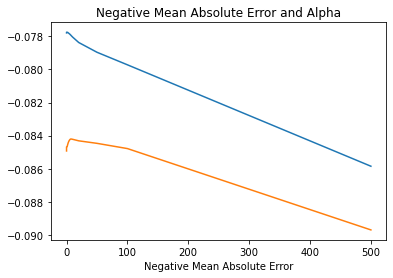

In [52]:
#plotting mean test and train scores with alpha
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

plt.plot(ridge_cv_results['param_alpha'],ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'],ridge_cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.xlabel('Negative Mean Absolute Error')
plt.title('Negative Mean Absolute Error and Alpha')
plt.show()

In [53]:
#getting best estimator for lambda
ridge_model_cv.best_estimator_

Ridge(alpha=7.0)

In [54]:
#checking the corfficient values with lambda 7
alpha = 7
ridge = Ridge(alpha=alpha)
ridge.fit(X_train,y_train)
ridge.coef_

array([ 0.02256411,  0.07101712,  0.04378783,  0.02797982,  0.05014156,
        0.01535456,  0.01447771,  0.08118301,  0.01159782,  0.01290064,
        0.02279445,  0.02129615,  0.0350362 ,  0.00991369, -0.01038431,
       -0.0193559 ,  0.01549322,  0.01822888,  0.00826259,  0.01975853,
        0.01722387, -0.01965013,  0.01465268,  0.06177186,  0.02417784,
        0.09130803,  0.06542686,  0.02590221, -0.01027691, -0.0082892 ,
        0.0238707 , -0.01552969, -0.00827894,  0.0178005 , -0.00958341,
       -0.0123186 ,  0.01352918, -0.03950189, -0.03110735,  0.01302745,
       -0.01850038,  0.03542456,  0.02012539,  0.01946798,  0.04397001,
        0.01373038,  0.00628828, -0.01087513, -0.00904629, -0.01137373])

In [55]:
#Checking MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, ridge.predict(X_test))

0.013794698950198954

In [56]:
#Place attributes and coefficients in a dataframe
dfridge = pd.DataFrame({'Attributes':X_train.columns, 'Coefficients':ridge.coef_.round(4)})
dfridge.reset_index(drop=True, inplace=True)
dfridge

,Attributes,Coefficients
0,LotArea,0.0226
1,OverallQual,0.0710
2,OverallCond,0.0438
3,BsmtFinSF1,0.0280
4,TotalBsmtSF,0.0501
5,1stFlrSF,0.0154
6,2ndFlrSF,0.0145
7,GrLivArea,0.0812
8,BsmtFullBath,0.0116
9,FullBath,0.0129


In [57]:
# create a dict with attributes and their coefficients
dict_ridge_coeff = dict(pd.Series(ridge.coef_.round(4),X_train.columns))
dict_ridge_coeff

{'LotArea': 0.0226,
 'OverallQual': 0.071,
 'OverallCond': 0.0438,
 'BsmtFinSF1': 0.028,
 'TotalBsmtSF': 0.0501,
 '1stFlrSF': 0.0154,
 '2ndFlrSF': 0.0145,
 'GrLivArea': 0.0812,
 'BsmtFullBath': 0.0116,
 'FullBath': 0.0129,
 'HalfBath': 0.0228,
 'Fireplaces': 0.0213,
 'GarageCars': 0.035,
 'WoodDeckSF': 0.0099,
 'isRemodel': -0.0104,
 'BuiltOrRemodelTime': -0.0194,
 'NewOrOldGarage': 0.0155,
 'd_BsmtExposure': 0.0182,
 'd_BsmtFinType1': 0.0083,
 'd_HeatingQC': 0.0198,
 'd_KitchenQual': 0.0172,
 'd_BldgType': -0.0197,
 'd_SaleCondition': 0.0147,
 'MSZoning_FV': 0.0618,
 'MSZoning_RH': 0.0242,
 'MSZoning_RL': 0.0913,
 'MSZoning_RM': 0.0654,
 'Neighborhood_Crawfor': 0.0259,
 'Neighborhood_Edwards': -0.0103,
 'Neighborhood_MeadowV': -0.0083,
 'Neighborhood_NridgHt': 0.0239,
 'Neighborhood_OldTown': -0.0155,
 'Neighborhood_SWISU': -0.0083,
 'Neighborhood_StoneBr': 0.0178,
 'Exterior1st_BrkComm': -0.0096,
 'Exterior1st_CemntBd': -0.0123,
 'Exterior1st_Stucco': 0.0135,
 'Exterior1st_VinylSd': 

In [58]:
#Minimize to 15 features
X_train_ridge = X_train[dfridge.Attributes]
lm= LinearRegression()
lm.fit(X_train_ridge, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train_ridge, y_train)

In [59]:
dftemp1 = pd.DataFrame(list(zip(X_train_ridge.columns,rfe.support_,rfe.ranking_)),columns=['Features','rfe_support',
                                                                                          'rfe_ranking'])
dftemp1 = dftemp1.loc[dftemp1['rfe_support'] == True]
dftemp1.reset_index(drop=True,inplace=True)
dftemp1['Coefficient'] = dftemp1['Features'].apply(lambda x: dict_ridge_coeff[x])
dftemp1 = dftemp1.sort_values(by=['Coefficient'],ascending=False)
dftemp1 = dftemp1.head(10)
dftemp1

,Features,rfe_support,rfe_ranking,Coefficient
10,MSZoning_RL,True,1,0.0913
5,GrLivArea,True,1,0.0812
1,OverallQual,True,1,0.0710
11,MSZoning_RM,True,1,0.0654
9,MSZoning_FV,True,1,0.0618
4,TotalBsmtSF,True,1,0.0501
14,Foundation_PConc,True,1,0.0440
2,OverallCond,True,1,0.0438
7,GarageCars,True,1,0.0350
3,BsmtFinSF1,True,1,0.0280


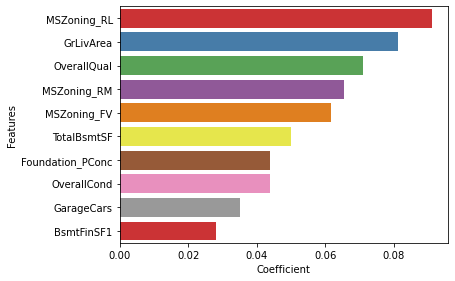

In [60]:
#Attributes that would be affected using Ridge Regression
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y='Features',x='Coefficient',palette='Set1',data=dftemp1)
plt.show()

Ridge Regression Model based top 10 variables which are significant in predicting the price of a house

#### Lasso Regression

In [61]:
lasso = Lasso()
params = {'alpha':[0.0001,0.0002,0.0003,0.0004,0.0005,0.001,0.002,0.003,0.004,0.005,0.01]}
folds = 5
lasso_model_cv = GridSearchCV(estimator=lasso,param_grid=params,scoring='neg_mean_absolute_error'
                              ,cv =folds,return_train_score=True,verbose=1)
lasso_model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    3.1s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [62]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha','mean_train_score','mean_test_score','rank_test_score']].sort_values(by=['rank_test_score']) 

,param_alpha,mean_train_score,mean_test_score,rank_test_score
4,0.0005,-0.078114,-0.084533,1
3,0.0004,-0.077993,-0.084543,2
2,0.0003,-0.077908,-0.084584,3
1,0.0002,-0.077843,-0.084634,4
0,0.0001,-0.077785,-0.084734,5
5,0.001,-0.078841,-0.084997,6
6,0.002,-0.079843,-0.085594,7
7,0.003,-0.080427,-0.085829,8
8,0.004,-0.080879,-0.086233,9
9,0.005,-0.081408,-0.086695,10


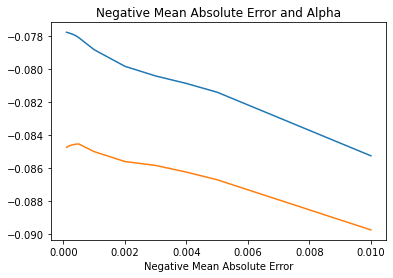

In [63]:
#plotting mean test and train scores with alpha
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

plt.plot(lasso_cv_results['param_alpha'],lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'],lasso_cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.xlabel('Negative Mean Absolute Error')
plt.title('Negative Mean Absolute Error and Alpha')
plt.show()

In [64]:
#getting best estimator for lambda
lasso_model_cv.best_estimator_

Lasso(alpha=0.0005)

In [65]:
#checking the corfficient values with lambda 0.0005
alpha = 0.0005
lasso = Lasso(alpha=alpha)
lasso.fit(X_train,y_train)
lasso.coef_

array([ 0.02208724,  0.07322995,  0.04366474,  0.02902515,  0.05042588,
        0.0031336 , -0.        ,  0.09810016,  0.01067705,  0.01115026,
        0.02163442,  0.02124919,  0.03577235,  0.00968807, -0.01015703,
       -0.01956983,  0.01474793,  0.01801375,  0.00742186,  0.01920375,
        0.01688877, -0.01889321,  0.01460014,  0.06268182,  0.02404039,
        0.09383421,  0.06565654,  0.02522193, -0.009733  , -0.00736302,
        0.02261914, -0.01522602, -0.00859469,  0.0167559 , -0.00933129,
       -0.        ,  0.0122854 , -0.02775598, -0.02845663,  0.00077231,
       -0.01718798,  0.02409007,  0.01675704,  0.01697285,  0.04208125,
        0.01264242,  0.00569495, -0.01020267, -0.00851978, -0.01092637])

In [66]:
#Checking MSE
mean_squared_error(y_test, lasso.predict(X_test))

0.013578910596219136

In [67]:
#Place attributes and coefficients in a dataframe
df_lasso = pd.DataFrame({'Attributes':X_train.columns, 'Coefficients':lasso.coef_.round(4)})
df_lasso = df_lasso[df_lasso['Coefficients'] != 0.00]
df_lasso.reset_index(drop=True, inplace=True)
df_lasso

,Attributes,Coefficients
0,LotArea,0.0221
1,OverallQual,0.0732
2,OverallCond,0.0437
3,BsmtFinSF1,0.0290
4,TotalBsmtSF,0.0504
5,1stFlrSF,0.0031
6,GrLivArea,0.0981
7,BsmtFullBath,0.0107
8,FullBath,0.0112
9,HalfBath,0.0216


In [68]:
# create a dict with attributes and their coefficients
dict_lasso_coeff = dict(pd.Series(lasso.coef_.round(4),X_train.columns))
dict_lasso_coeff

{'LotArea': 0.0221,
 'OverallQual': 0.0732,
 'OverallCond': 0.0437,
 'BsmtFinSF1': 0.029,
 'TotalBsmtSF': 0.0504,
 '1stFlrSF': 0.0031,
 '2ndFlrSF': -0.0,
 'GrLivArea': 0.0981,
 'BsmtFullBath': 0.0107,
 'FullBath': 0.0112,
 'HalfBath': 0.0216,
 'Fireplaces': 0.0212,
 'GarageCars': 0.0358,
 'WoodDeckSF': 0.0097,
 'isRemodel': -0.0102,
 'BuiltOrRemodelTime': -0.0196,
 'NewOrOldGarage': 0.0147,
 'd_BsmtExposure': 0.018,
 'd_BsmtFinType1': 0.0074,
 'd_HeatingQC': 0.0192,
 'd_KitchenQual': 0.0169,
 'd_BldgType': -0.0189,
 'd_SaleCondition': 0.0146,
 'MSZoning_FV': 0.0627,
 'MSZoning_RH': 0.024,
 'MSZoning_RL': 0.0938,
 'MSZoning_RM': 0.0657,
 'Neighborhood_Crawfor': 0.0252,
 'Neighborhood_Edwards': -0.0097,
 'Neighborhood_MeadowV': -0.0074,
 'Neighborhood_NridgHt': 0.0226,
 'Neighborhood_OldTown': -0.0152,
 'Neighborhood_SWISU': -0.0086,
 'Neighborhood_StoneBr': 0.0168,
 'Exterior1st_BrkComm': -0.0093,
 'Exterior1st_CemntBd': -0.0,
 'Exterior1st_Stucco': 0.0123,
 'Exterior1st_VinylSd': -0.02

In [69]:
#Minimize to 15 features
X_train_lasso = X_train[df_lasso.Attributes]
lm= LinearRegression()
lm.fit(X_train_lasso, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train_lasso, y_train)

In [70]:
dftemp2 = pd.DataFrame(list(zip(X_train_lasso.columns,rfe.support_,rfe.ranking_)),columns=['Features','rfe_support',
                                                                                          'rfe_ranking'])
dftemp2 = dftemp1.loc[dftemp2['rfe_support'] == True]
dftemp2.reset_index(drop=True,inplace=True)
dftemp2['Coefficient'] = dftemp2['Features'].apply(lambda x: dict_lasso_coeff[x])
dftemp2 = dftemp2.sort_values(by=['Coefficient'],ascending=False)
dftemp2 = dftemp2.head(10)
dftemp2

,Features,rfe_support,rfe_ranking,Coefficient
0,MSZoning_RL,True,1,0.0938
1,OverallQual,True,1,0.0732
2,MSZoning_RM,True,1,0.0657
3,TotalBsmtSF,True,1,0.0504
5,OverallCond,True,1,0.0437
4,Foundation_PConc,True,1,0.0421
6,BsmtFinSF1,True,1,0.0290


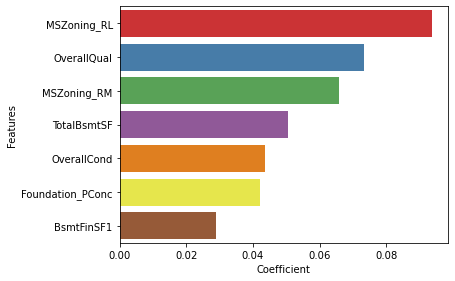

In [71]:
#Attributes that would be affected using Lasso Regression
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y='Features',x='Coefficient',palette='Set1',data=dftemp2)
plt.show()

Lasso Regression Model based top 7 variables which are significant in predicting the price of a house

## Conclusion

- **The value of lambda in Ridge is 7**
- **The value of lambda in Lasso is 0.0005**
- **The Mean Squared Error for Ridgde is 0.013794698950198954**
- **The Mean Squared Error for Lasso is 0.013578910596219136**
- The MSE of Lasso is slightly less than Ridge.
- As Lasso has the advantage of reducing unnecessary parameter(coefficient of a attribute was zero).Lasso can provide better
  prediction(as we got 7 attributes).
- According to Lasso Model,the feature affecting the pricing are MSZoning_RL, OverallQual, MSZoning_RM, TotalBsmtSF, OverallCond, Foundation_PConc, BsmtFinSF1.(Zoning Classification, Total Basment in square feet, Foundation type of House, Overall quality and condition of house,Basement finished square feet)